In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import seaborn
import statistics 

# Подготовительный этап

Рассмотрим случайную величину $Y$ со  
следующей квантильной функцией
$F^{-1} (y) = \theta \sqrt{y}$


In [2]:
def q_Y(p, theta = 1):
        return (np.sqrt(p) * theta)

Тогда функция распределения примет вид
$F(x) = x^2 / \theta^2$,  
при $x \in [0,\theta]$

In [3]:
def F_Y(t,  theta = 1):                                  
    val = (t / theta) ** 2
    val[(t < 0)] = 0
    val[(t > theta)] = 1
    return (val)

# Оценивание параметров распределения

Теоретическое матожидание $E[Y]=\int_0^\theta x dF(x) = \frac{2}{3} \theta$

In [4]:
theta = 2 #истинное значение
n = 1000
u = st.uniform.rvs(size = n,  loc = 0, scale = 1)       

# Сгенерируем выборку из того же
# распределения, что и у с.в. Y
x = q_Y(u, theta)


In [5]:
# Рассмотрим три оценки параметра theta
theta_1 = 1.5 * np.mean(x)
theta_2 = max(x)
theta_3 = 5 * np.log(np.median(x))



In [6]:
# Рассчитаем реализации оценок при
# различных объемах выборки: от 1 до n
x_theta1= []
x_theta2= []
x_theta3= []


for i in range(n):
    uni = st.uniform.rvs(size=n)
    x=q_Y(theta=theta, p=uni)
    x_theta1.append(1.5 * np.mean(x))
    x_theta2.append(max(x))
    x_theta3.append(5 * np.log(np.median(x)))
    
    

[]

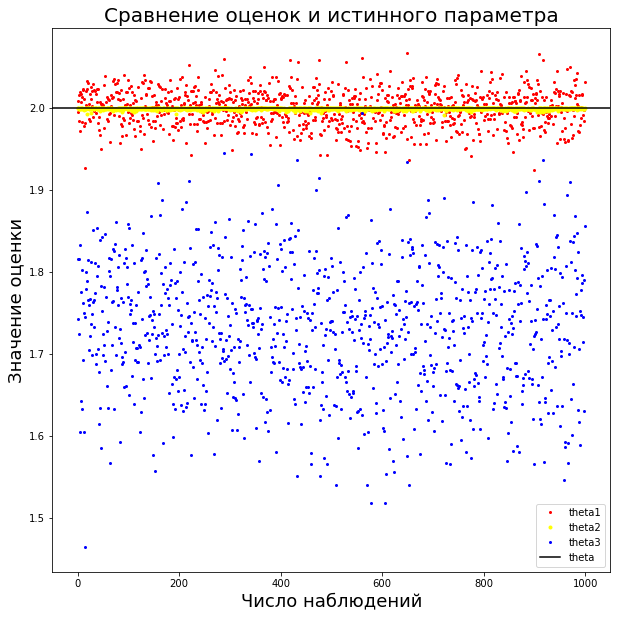

In [7]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)

ax.plot(x_theta1, linestyle = '', marker = 'o', color='r', markersize=2, label = 'theta1')
ax.plot(x_theta2,  linestyle = '', marker = 'o', color='yellow', markersize=3, label = 'theta2')
ax.plot(x_theta3,  linestyle = '', marker = 'o', color='b', markersize=2, label = 'theta3')

ax.axhline(y = theta , linestyle='-',                  # истинное значение оцениваемого
            color='black', label = "theta")              # параметра theta

ax.set_title('Сравнение оценок и истинного параметра', fontsize=20)
ax.set_xlabel('Число наблюдений', fontsize=18)
ax.set_ylabel('Значение оценки', fontsize=18)

ax.legend()

plt.plot()

0. Видим, что самой эффективной оказалась оценка 2.  
Поскольку распределение нерегулярно и плотность у максимума самая высокая, то такая оценка оказывается очень удачной  
1. Реализации оценки theta_1 колеблются вокруг
истинного значения оцениваемого параметр theta,
примерно с равной вероятностью и в равной степени
превышая или оказываясь меньше theta, поскольку
оценка theta_1 несмещенная.
2. При достаточно больших объемах выборки реализации
оценок theta_1 и theta_2 оказываются очень близки
к истинному значению и практически не колеблятся
рядом с ним. Это происходит потому, что theta_1
и theta_2 состоятельные.
3. Колебания реализаций theta_2 по отношению к
истинному значению существенно слабее, чем у
theta_1, потому что theta_2 более эффективна.
4. Реализации оценок theta_3 обычно далеки от
истинного значения и не приближаются к нему
по мере увеличения объема выборки, поскольку
оценка theta_3 не состоятельная.

# Распределение оценок

In [8]:
# Визуализируем
# распределение оценки theta_2

$\theta = max\{X_1,\dotsc,X_n\}$  
$P\{\theta <=x  \}= P\{X_1<=x , \dotsc, X_n<=x\} = F(x)^n$

In [9]:
N=1000

#вектор реализаций оценки
theta2_vec= np.array([max( q_Y(p = st.uniform.rvs(size=n), theta=theta) ) for i in range(N)] )

theta2_vec = np.sort(theta2_vec)
# функция распределения theta_2 в точках реализаций оценок
F_theta2 = F_Y(theta2_vec, theta) ** n

# функция плотности theta_2 в точках реализаций оценок
f_theta2 = (2 * n  / theta) * \
            ((theta2_vec / theta) ** (2 * n))       



[]

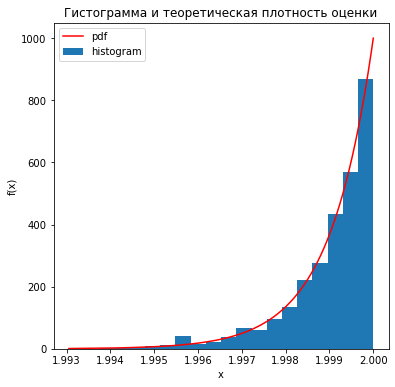

In [10]:

fig,ax=plt.subplots()
fig.set_size_inches(6,6)

ax.plot(theta2_vec,f_theta2 , linestyle = '-',
        color='r',label = 'pdf')
ax.hist(theta2_vec, density=True, label = 'histogram', bins=20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Гистограмма и теоретическая плотность оценки')

ax.legend()
plt.plot()


[]

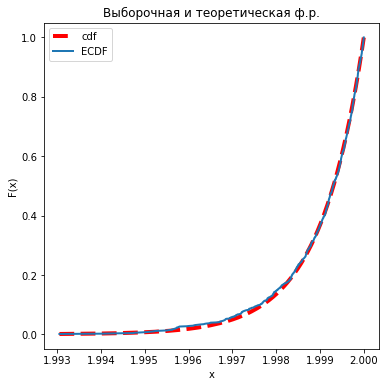

In [11]:
ECDF = [i/n for i in range(1,n+1)]
fig,ax=plt.subplots()
fig.set_size_inches(6,6)

ax.plot(theta2_vec,F_theta2 , linestyle = '--',
        color='r',label = 'cdf', linewidth=4)
ax.plot(theta2_vec, ECDF, label = 'ECDF', linewidth=2 )
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Выборочная и теоретическая ф.р.')

ax.legend()
plt.plot()


# Оценивание прочих характеристик распределения

In [12]:
    # Математическое ожидание E(Y)
print('E(y) = ', 2 * theta / 3  )

# оценка E(Y), полученная с использованием теоремы Слуцкого
print('E_cap(y) = ',2 * theta_2 / 3)

print('выб. среднее = ',np.mean(x),'\n')

print('D(y) = ',(theta ** 2) / 18 )  

# оценка Var(Y), полученная с использованием теоремы Слуцкого
print('D_cap(y) = ',(theta_2 ** 2) / 18)
print('выб. дисп. = ',np.var(x))
print('Исправленная выб. дисп. = ',np.var(x, ddof = 1)) 



E(y) =  1.3333333333333333
E_cap(y) =  1.3328074557329541
выб. среднее =  1.3546787719147244 

D(y) =  0.2222222222222222
D_cap(y) =  0.22204696425716877
выб. дисп. =  0.21914299514543245
Исправленная выб. дисп. =  0.2193623575029354


# Задания


In [13]:
# 1. Для выборки из экспоненциального распределения с
#    параметром 'lambda = 5', ориентируясь на
#    графики реализаций оценок при различных
#    объемах выборки, предположите, какими
#    свойствами обладают следующие оценки параметра
#    lambda и какая из них является наиболее эффективной:
#    1)     np.mean(x)
#    2)     1 / np.mean(x)
#    3)     1 / (10 + np.mean(x))
#    4)     1 / (np.log(n) + np.mean(x))
#    5)     1 / (np.log(n) / n + np.mean(x))
#    6)     np.median(x)
#    7)     np.log(2) / np.median(x)

In [14]:
N=1000
n=5000
mu = 5

x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]

for i in range(n):
    x= st.poisson.rvs(mu,size=N)
    x1.append(np.mean(x))
    x2.append(1/np.mean(x))
    x3.append(1/(10+np.mean(x)))
    x4.append(1/(np.log(n)  + np.mean(x)))
    x5.append( 1/(np.log(n)/n  + np.mean(x))     )
    x6.append(np.median(x))
    x7.append(np.log(2) / np.median(x))


[]

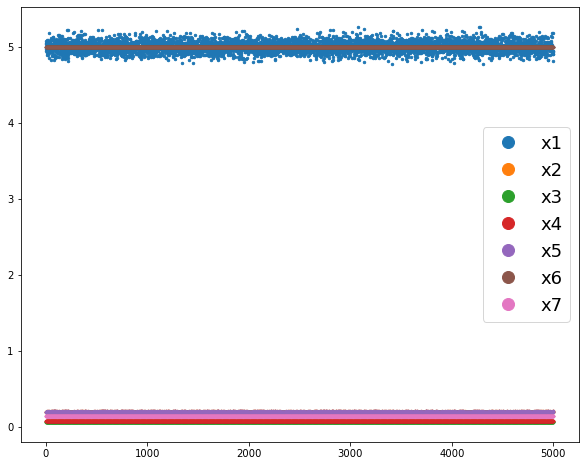

In [15]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)



ax.plot(x1, ' ', marker ='o', markersize=2.4, label ='x1')
ax.plot(x2, ' ', marker ='o', markersize=2.4, label ='x2')
ax.plot(x3, ' ', marker ='o', markersize=2.4, label ='x3')
ax.plot(x4, ' ', marker ='o', markersize=2.4, label ='x4')
ax.plot(x5, ' ', marker ='o', markersize=2.4, label ='x5')
ax.plot(x6, ' ', marker ='o', markersize=2.4, label ='x6')
ax.plot(x7, ' ', marker ='o', markersize=2.4, label ='x7')

ax.legend(fontsize=18,markerscale =5)
plt.plot()

    

Видим что состаятельными и несмещенными оказались оценки:  
1. Выборочное среднее
2. Медиана

Причем медиана более эффективна

In [16]:
# 2. Для выборки из распределения Пуассона с
#    параметром 'lambda = 2', ориентируясь на
#    графики реализаций оценок при различных
#    объемах выборки, предположите, какими
#    свойствами обладают следующие оценки параметра
#    lambda и какая из них является наиболее эффективной:
#    1)     np.mean(x)
#    2)     np.var(x)
#    3*)    Выборочная мода (если их две, берется среднее)
#    4)     np.median(x)
#    5)     np.median(x) + (1 / 3)

In [19]:


mode=np.mean(statistics.multimode(([1,1,1,2,3,4,2,2])))

(array([134.,   0., 264.,   0.,   0., 264.,   0., 182.,   0.,   0.,  98.,
          0.,  35.,   0.,   0.,  13.,   0.,   6.,   0.,   4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 20 artists>)

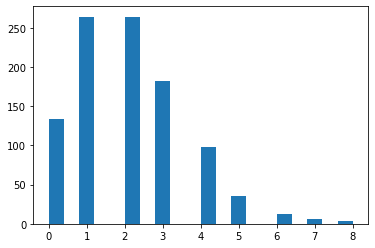

In [21]:
mu = 2 
n=1000
N= 5000

x1=[]
x2=[]
x3=[]
x4=[]
x5=[]

for i in range(N):
    x= st.poisson.rvs(mu,size=n)
    x1.append(np.mean(x))
    x2.append(np.var(x))
    x3.append(np.mean(statistics.multimode(x)))
    x4.append(np.median(x))
    x5.append(np.median(x) + (1/3) ) 
    

plt.hist(x,bins=20)

[]

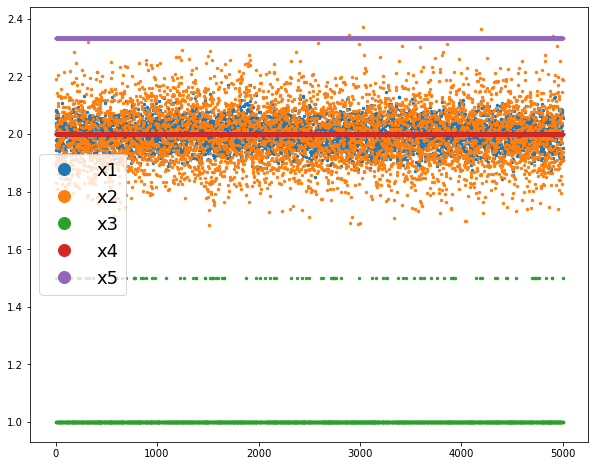

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)



ax.plot(x1, ' ', marker ='o', markersize=2.4, label ='x1')
ax.plot(x2, ' ', marker ='o', markersize=2.4, label ='x2')
ax.plot(x3, ' ', marker ='o', markersize=2.4, label ='x3')
ax.plot(x4, ' ', marker ='o', markersize=2.4, label ='x4')
ax.plot(x5, ' ', marker ='o', markersize=2.4, label ='x5')


ax.legend(fontsize=18,markerscale =5)
plt.plot()

Из графиков видно, что 
1. Оценка 1 состоятельная и несмещена
2. Оценка 2 состоятельна и несмещена, но обладает большой дисперсией 
3. Оценка 3 смещена и несостотельна
4. Оценка 4 состоятельна, несмещена и наиболее эффективна
5. Оценка 5 смещена, при поправке на смещение она станет состоятельной и наиболее эффективной 

In [23]:
# 3. Для выборки из двумерного нормального распределения,
#    со стандартными нормальными маржинальными распределениями
#    и корреляцией 'rho = 0.5', ориентируясь на
#    графики реализаций оценок при различных
#    объемах выборки, предположите, какими
#    свойствами обладают следующие оценки параметра rho и
#    какая из них является наиболее эффективной:
#    1)     np.corrcoef(x, y)
#    2)     np.mean(x * y)
#    3)     0.2 * np.corrcoef(x, y) + 0.5 * np.mean(x * y)

In [41]:
n=1000
N=10000
mu= [0,0]
rho = 0.5
sigma=np.array([  [1,rho],[rho,1]])

sigma

array([[1. , 0.5],
       [0.5, 1. ]])

In [55]:

x1=[]
x2=[]
x3=[]

for i in range(n,N,10):    
    z = st.multivariate_normal.rvs(mean = mu,cov = sigma, size = i)
    
    x= z[:,0]
    y=z[:,1]
    x1.append(np.corrcoef(x,y)[0][1])
    x2.append(np.mean(x*y))
    x3.append( 0.2 * np.corrcoef(x, y)[0][1] + 0.5 * np.mean(x * y))

[]

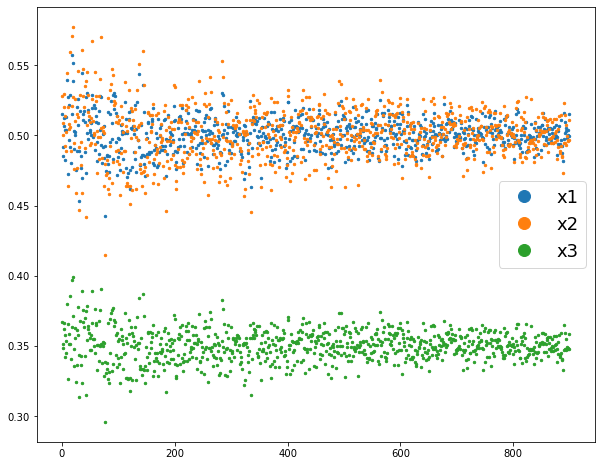

In [56]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)



ax.plot(x1, ' ', marker ='o', markersize=2.4, label ='x1')
ax.plot(x2, ' ', marker ='o', markersize=2.4, label ='x2')
ax.plot(x3, ' ', marker ='o', markersize=2.4, label ='x3')

ax.legend(fontsize=18,markerscale =5)
plt.plot()

1. Оценка 1 состоятельна, несмещена и наиболее эффективна
2. Оценка 2 состоятельна, несмещена
3. Оценка 3 смещена